# Problem Statement
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

 
Also, determine the optimal value of lambda for ridge and lasso regression.


### Business Goal

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
# Importing required libraries

import numpy as np
import pandas as pd

import calendar

pd.options.display.max_rows = 1000
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import metrics

import statsmodels.api as sm
from scipy import stats
from scipy.stats import skew 

import warnings
warnings.filterwarnings("ignore")

### Loading Data

In [2]:
# Reading CSV file using pandas
housingData = pd.read_csv("train.csv")
housingData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
## Checking the shape of dataframe to understand the rows and columns.
housingData.shape

(1460, 81)

In [4]:
# Getting details of the data
housingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# checking the spread of data and SD, Mean, Median and mode
housingData.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


#### Observation:
- For many features, mean and median have substantial difference like for feature GrLivArea, 1stFlrSF etc.
- For many features such as LotArea, MiscVal, there is a huge difference in Q3 and max values.

### Data Cleaning and Preparation

In [6]:
# Checking columns with missing values and %age of missing values in descending order
mis_val = housingData.isnull().sum()
mis_val_percentage = 100*mis_val/len(housingData)
missing_val = pd.concat([mis_val,mis_val_percentage],axis =1)
missing_val = missing_val.rename(columns = {0:'Missing Values',1:'% of Total Values'})
missing_val = missing_val.sort_values('Missing Values',ascending = False)
missing_val[(missing_val['Missing Values'] > 0)]

,Missing Values,% of Total Values
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945
GarageFinish,81,5.547945


In [7]:
# Checking the unique values for the columns with missing values, for better understanding of feature.
nullCols = ['Alley','PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', 'LotFrontage',
       'GarageYrBlt', 'GarageCond', 'GarageType', 'GarageFinish', 'GarageQual',
       'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1',
       'MasVnrArea', 'MasVnrType', 'Electrical']

for colName in nullCols:
    print(colName)
    print(housingData[colName].unique())
    print("---------------------------")

Alley
[nan 'Grvl' 'Pave']
---------------------------
PoolQC
[nan 'Ex' 'Fa' 'Gd']
---------------------------
Fence
[nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
---------------------------
MiscFeature
[nan 'Shed' 'Gar2' 'Othr' 'TenC']
---------------------------
FireplaceQu
[nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
---------------------------
LotFrontage
[ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
---------------------------
GarageYrBlt
[2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939

### Imputing null values

In [8]:
# Imputing values for categorical data where NaN represents a category

housingData['Alley'] = housingData['Alley'].fillna('No_Alley')
housingData['PoolQC'] = housingData['PoolQC'].fillna('No_Pool')
housingData['Fence'] = housingData['Fence'].fillna('No_Fence')
housingData['FireplaceQu'] = housingData['FireplaceQu'].fillna('No_FP')
housingData['MiscFeature'] = housingData['MiscFeature'].fillna('No_Feature')
housingData['MasVnrType'] = housingData['MasVnrType'].fillna('None')
housingData['BsmtQual'] = housingData['BsmtQual'].fillna('No_Basement')
housingData['BsmtCond'] = housingData['BsmtCond'].fillna('No_Basement')
housingData['BsmtExposure'] = housingData['BsmtExposure'].fillna('No_Basement')
housingData['BsmtFinType1'] = housingData['BsmtFinType1'].fillna('No_Basement')
housingData['BsmtFinType2'] = housingData['BsmtFinType2'].fillna('No_Basement')
housingData['GarageType'] = housingData['GarageType'].fillna('No_Garage')
housingData['GarageFinish'] = housingData['GarageFinish'].fillna('No_Garage')
housingData['GarageQual'] = housingData['GarageQual'].fillna('No_Garage')
housingData['GarageCond'] = housingData['GarageCond'].fillna('No_Garage')

In [9]:
# Imputing data for the numerical features.

housingData['LotFrontage'] = housingData['LotFrontage'].fillna(housingData['LotFrontage'].median()) 
housingData['MasVnrArea'] = housingData['MasVnrArea'].fillna(housingData['MasVnrArea'].median()) 
housingData['GarageYrBlt'] = housingData['GarageYrBlt'].fillna(0.0).apply(lambda x: int(x))
housingData['Electrical'] = housingData['Electrical'].fillna(housingData['Electrical'].mode()[0])

In [10]:
# Checking that all the Null values have been handled
mis_val = housingData.isnull().sum()
mis_val[mis_val > 0]

Series([], dtype: int64)

#### Observation:
- All the null values have been handled

In [11]:
# Check for duplicate data
dups = housingData.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
housingData[dups]

Number of duplicate rows = 0


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


 #### Observation:
- There are no duplicate rows.

### Derived Metrices

In [12]:
# Deriving AGE of the house/ Remodelling/ Garage based on YrSold
housingData['HouseBuiltAge'] = housingData.YrSold - housingData.YearBuilt
housingData['HouseRemodelAge'] = housingData.YrSold - housingData.YearRemodAdd
housingData['GarageAge'] = housingData.YrSold - housingData.GarageYrBlt

In [13]:
# Dropping Year data since it has been used to derive age
housingData = housingData.drop('YearBuilt', axis = 1)
housingData = housingData.drop('YearRemodAdd', axis = 1)
housingData = housingData.drop('GarageYrBlt', axis = 1)

## Exploratory Data Analysis

### Numerical Data

In [14]:
# Filtering out all the numerical features from the dataFrame
numCols = housingData.select_dtypes(include=np.number).columns.tolist()
numCols

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'HouseBuiltAge',
 'HouseRemodelAge',
 'GarageAge']

In [15]:
# Checking uniqueValueCounts for the numerical features to identify the categorical features represented as numericals.

for i in range(len(numCols)):
    print("The uniques Value Count for {0} : {1}".format(numCols[i], housingData[numCols[i]].nunique()))

The uniques Value Count for Id : 1460
The uniques Value Count for MSSubClass : 15
The uniques Value Count for LotFrontage : 110
The uniques Value Count for LotArea : 1073
The uniques Value Count for OverallQual : 10
The uniques Value Count for OverallCond : 9
The uniques Value Count for MasVnrArea : 327
The uniques Value Count for BsmtFinSF1 : 637
The uniques Value Count for BsmtFinSF2 : 144
The uniques Value Count for BsmtUnfSF : 780
The uniques Value Count for TotalBsmtSF : 721
The uniques Value Count for 1stFlrSF : 753
The uniques Value Count for 2ndFlrSF : 417
The uniques Value Count for LowQualFinSF : 24
The uniques Value Count for GrLivArea : 861
The uniques Value Count for BsmtFullBath : 4
The uniques Value Count for BsmtHalfBath : 3
The uniques Value Count for FullBath : 4
The uniques Value Count for HalfBath : 3
The uniques Value Count for BedroomAbvGr : 8
The uniques Value Count for KitchenAbvGr : 4
The uniques Value Count for TotRmsAbvGrd : 12
The uniques Value Count for Fir

### Observation:

- Based on the unique values for many variables are less and is categorical in nature.

So, we need to remove the categorical data from the numerical ones.

In [16]:
# Mapping actual values to the categorical variables - MSSubClass, OverallQual, OverallCond, MoSold

housingData.MSSubClass = housingData.MSSubClass.map({
20:'1-STORY 1946 & NEWER ALL STYLES', 
30:'1-STORY 1945 & OLDER', 
40:'1-STORY W/FINISHED ATTIC ALL AGES', 
45:'1-1/2 STORY - UNFINISHED ALL AGES', 
50:'1-1/2 STORY FINISHED ALL AGES', 
60:'2-STORY 1946 & NEWER', 
70:'2-STORY 1945 & OLDER', 
75:'2-1/2 STORY ALL AGES', 
80:'SPLIT OR MULTI-LEVEL', 
85:'SPLIT FOYER', 
90:'DUPLEX - ALL STYLES AND AGES', 
120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER', 
150:'1-1/2 STORY PUD - ALL AGES', 
160:'2-STORY PUD - 1946 & NEWER', 
180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER', 
190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'
})

housingData.OverallQual = housingData.OverallQual.map({10:'Very Excellent', 9:'Excellent', 8:'Very Good', 
                                                       7:'Good', 6:'Above Average', 5:'Average', 4:'Below Average', 
                                                       3:'Fair', 2:'Poor', 1:'Very Poor'})

housingData.OverallCond = housingData.OverallCond.map({10:'Very Excellent', 9:'Excellent', 8:'Very Good', 
                                                       7:'Good', 6:'Above Average', 5:'Average', 4:'Below Average', 
                                                       3:'Fair', 2:'Poor', 1:'Very Poor'})

housingData.MoSold = housingData.MoSold.apply(lambda x: calendar.month_abbr[x])

In [17]:
# creating DataFrame for the nnumerical features and checking its shape
numCols = ["Id", "LotFrontage", "LotArea","MasVnrArea","BsmtFinSF1","BsmtFinSF2","BsmtUnfSF","TotalBsmtSF",
           "1stFlrSF","2ndFlrSF","LowQualFinSF","GrLivArea","GarageArea","WoodDeckSF","OpenPorchSF",
           "PoolArea","MiscVal", 'HouseBuiltAge','HouseRemodelAge','GarageAge',
           "EnclosedPorch","3SsnPorch","ScreenPorch","SalePrice"]

numData = housingData[numCols]
numData.shape

(1460, 24)

### Numerical Features - Univariate Analysis

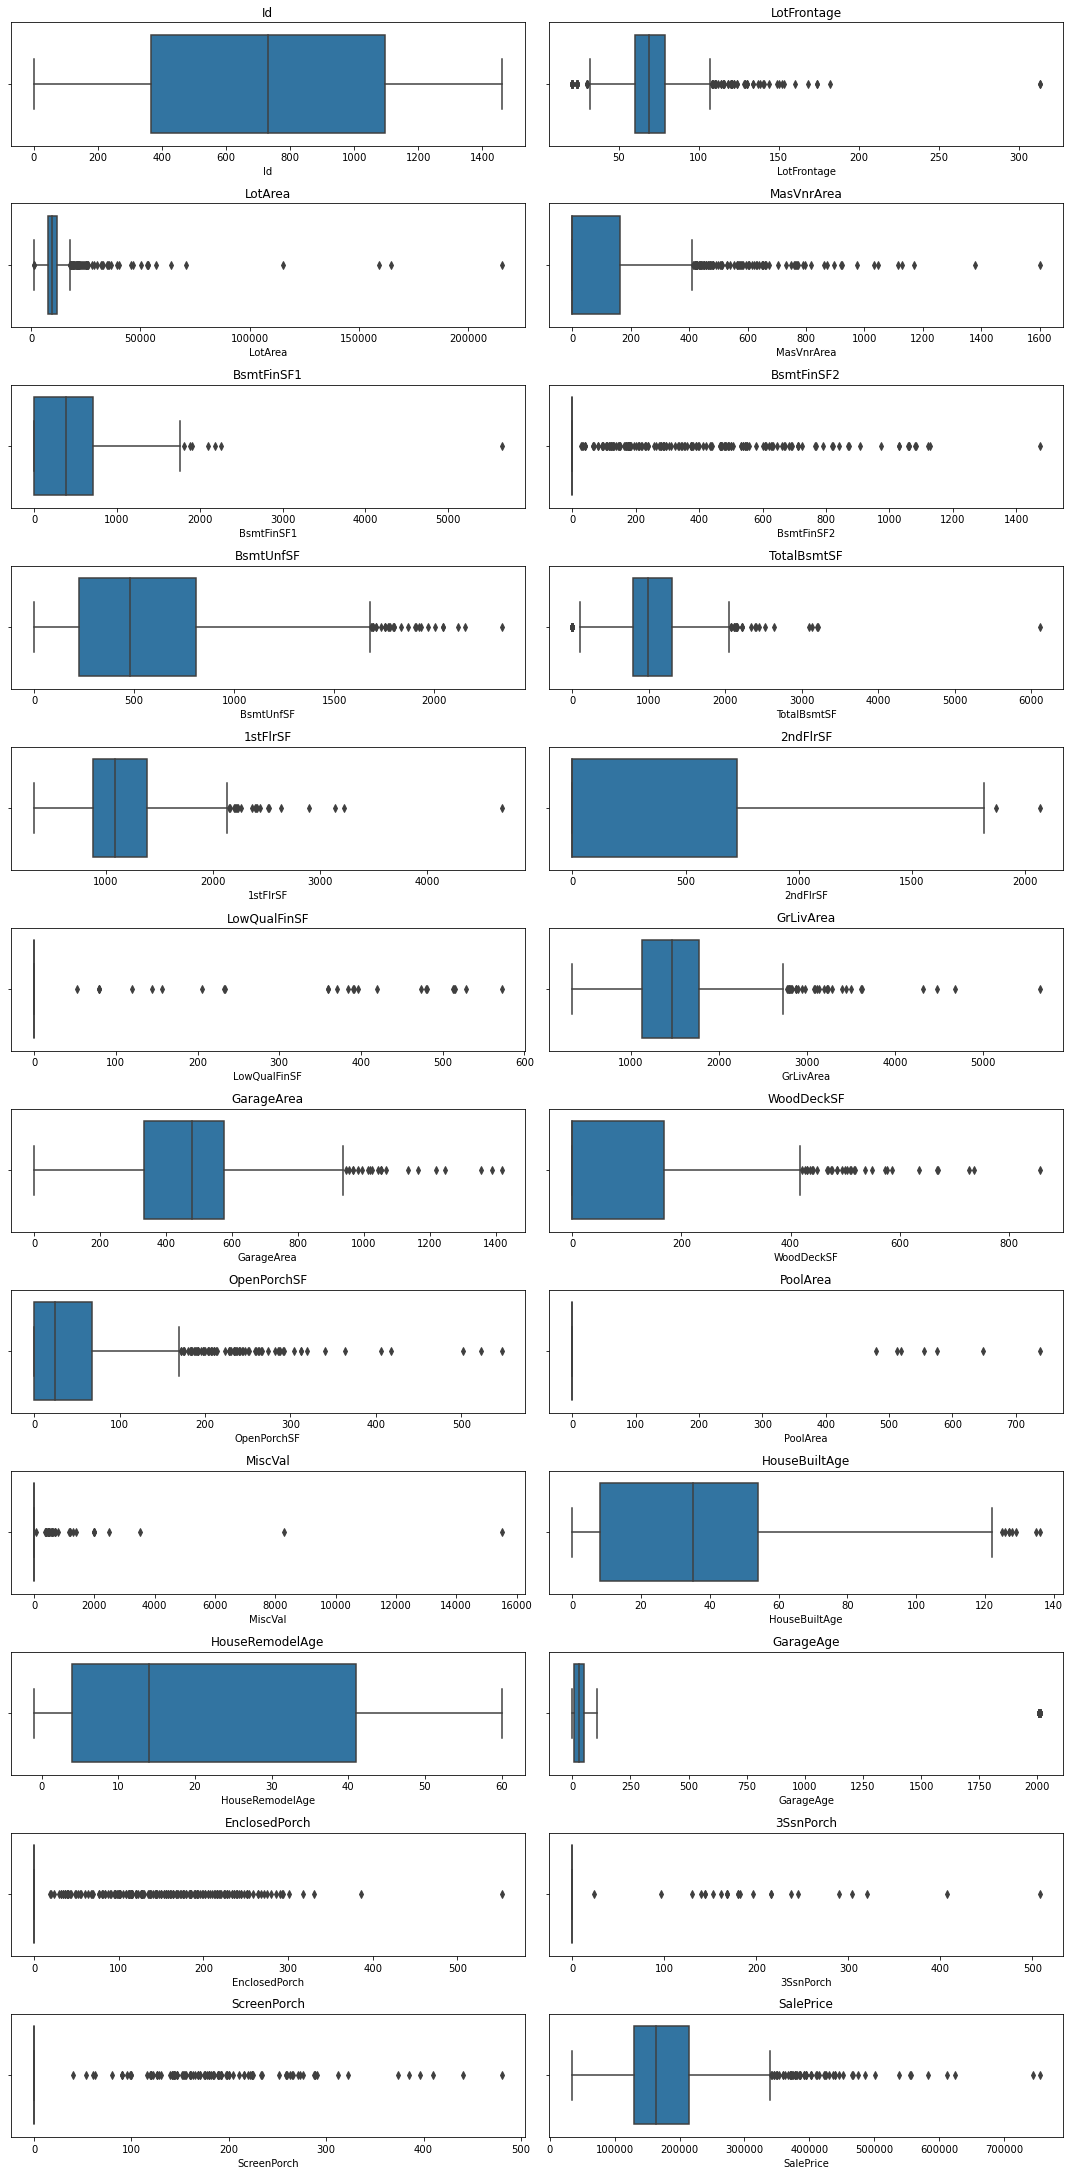

In [18]:
# Creating Box Plots for all the numerical features to understand the data spread

a = 20
b = 2
c = 1

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 50)

for i in numCols:
    plt.subplot(a, b, c)
    plt.title(i)
    plt.xlabel(i)
    sns.boxplot(numData[i])
    c = c + 1

plt.tight_layout()
plt.show();

#### Observation:
- The data spread is not consistent across the median suggesting the skewness in data.
- The data has outliers which needs to be handled.
- Many features like ScreenPorch, the data is dominated by a single value (0 in this case).


### Correlation - HeatMap

<AxesSubplot:>

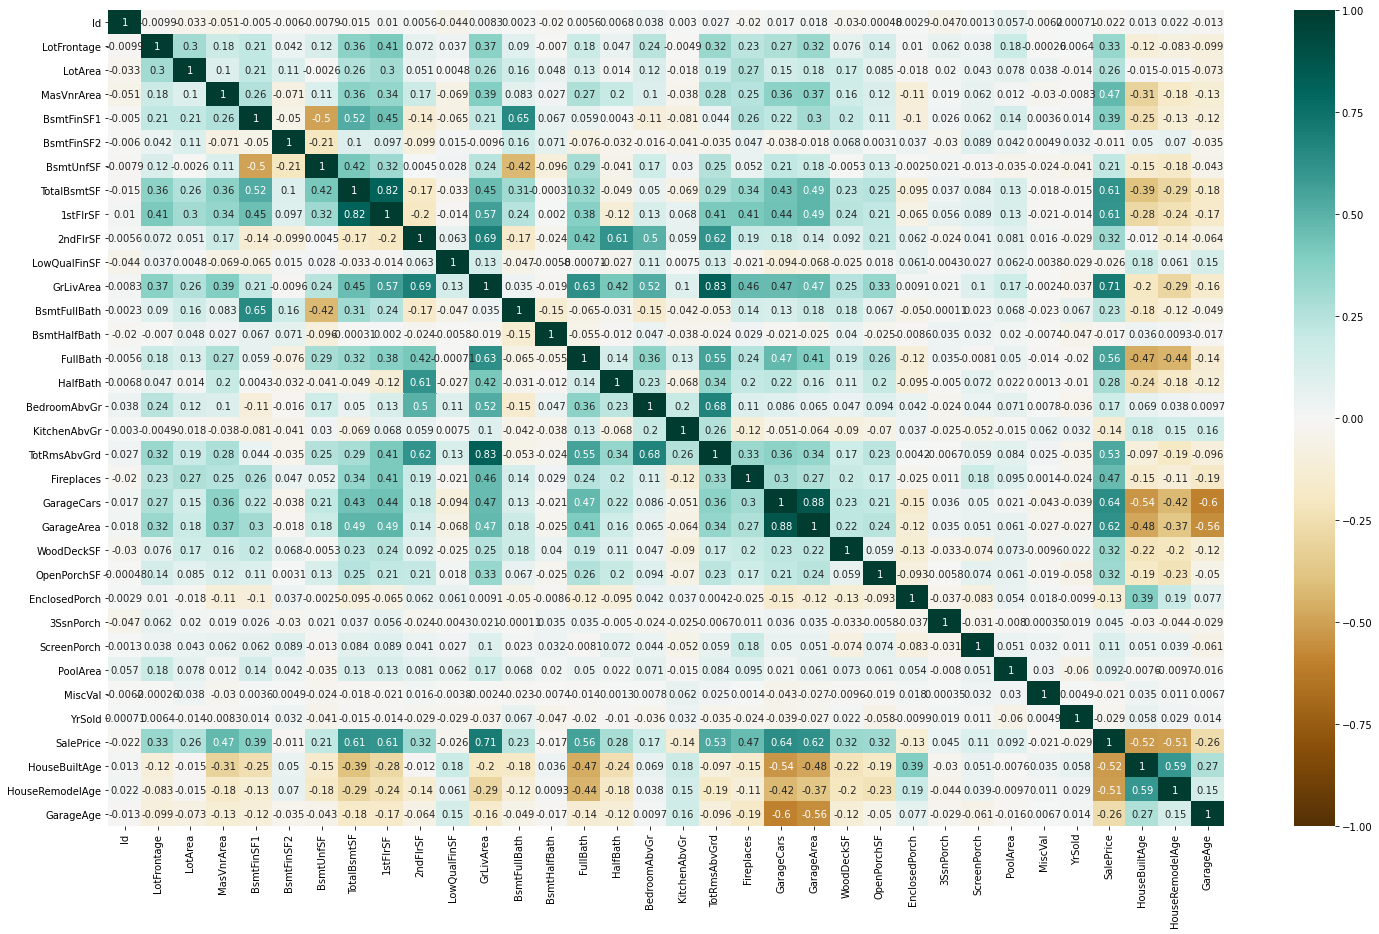

In [19]:
# Checking the correlation among the numerical features from the Housing DataFrame
plt.figure(figsize=(25, 15))

sns.heatmap(housingData.corr(),annot=True,vmin=-1, vmax=1, cmap='BrBG')

#### Observations:
- Target Variable - SalePrice - is higly correlated with GrLivArea, GarageArea, GarageCars, TotalBsmtSF etc.
- HouseBuiltAge, HouseRemodelAge and GarageAge has negative correlation with SalePrice.
- GarageArea and GarageCars are highly correlated to each other. Similarly TotalBsmtSF and 1stFlrSF.

In [20]:
# Converting the data type of categorical features to string from integer/float
targetCols = ["BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr",
               "TotRmsAbvGrd","Fireplaces","GarageCars", "YrSold"]

for i in targetCols:
    housingData[i] = housingData[i].apply(lambda x: str(x))


### Skewness in Features

In [21]:
# Identifying the skewness in the numerical data
skew_in_vars = numData.apply(lambda x: round(skew(x), 2))
skew_in_vars.sort_values(ascending=False)

MiscVal            24.45
PoolArea           14.81
LotArea            12.20
3SsnPorch          10.29
LowQualFinSF        9.00
BsmtFinSF2          4.25
ScreenPorch         4.12
GarageAge           3.87
EnclosedPorch       3.09
MasVnrArea          2.67
LotFrontage         2.41
OpenPorchSF         2.36
SalePrice           1.88
BsmtFinSF1          1.68
WoodDeckSF          1.54
TotalBsmtSF         1.52
1stFlrSF            1.38
GrLivArea           1.37
BsmtUnfSF           0.92
2ndFlrSF            0.81
HouseBuiltAge       0.61
HouseRemodelAge     0.50
GarageArea          0.18
Id                  0.00
dtype: float64

Observation:
- Some of the feature is highly skewed.
- Data needs to be log transformed.

Performing log transforms for data which has skew more that 0.5. i.e. high skewed data
We can ignore SalePrice for now, as it is Target variable. This will be handled separately.


In [22]:
# Dropping SalePrice - Target Variable from skew Series - can be handled separately
skew_in_vars = skew_in_vars.drop('SalePrice')

### Visualizing Skewness in Features

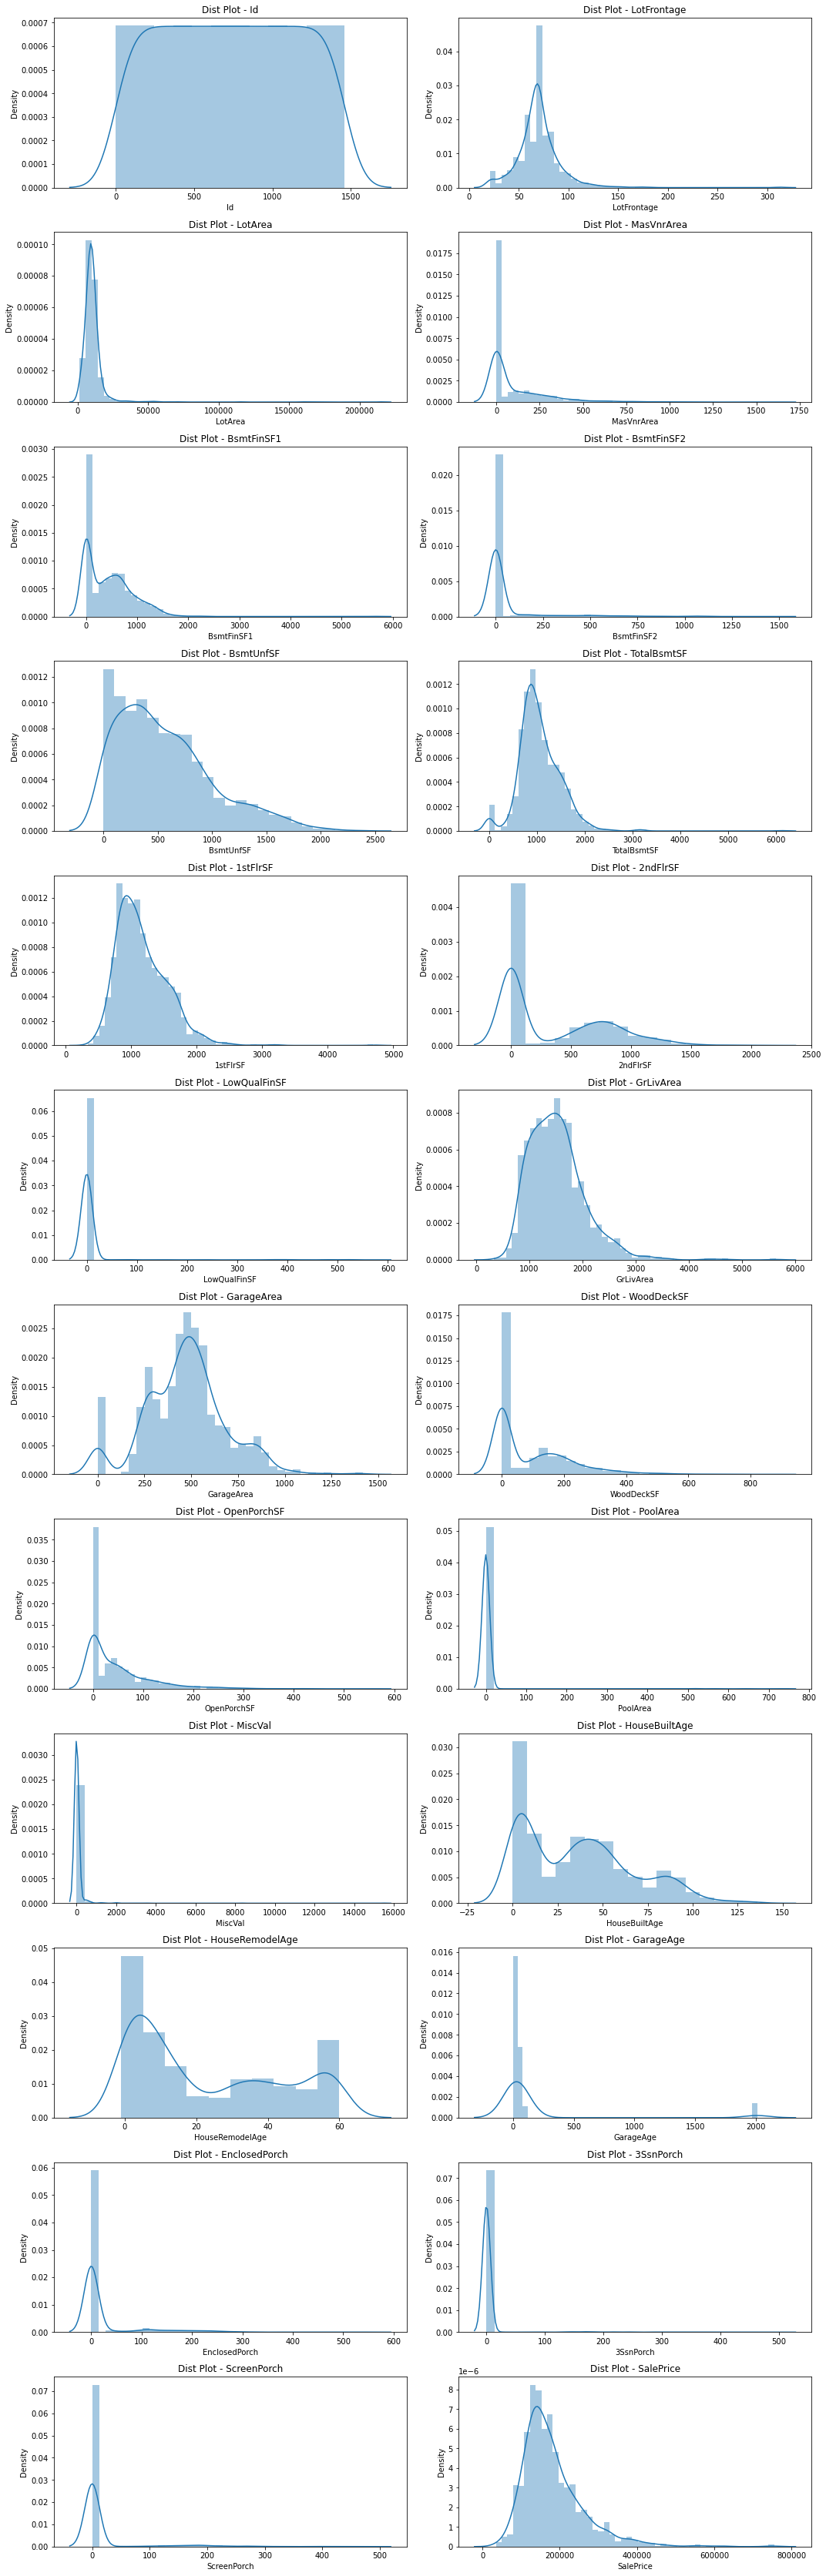

In [23]:
# Viewing the skewness for numerical data

target_col = numCols
a = (len(numCols)/2) + 1
b = 2
c= 1

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 50)
for i in target_col:
    
    plt.subplot(a, b, c)
    plt.title('Dist Plot - {}'.format(i))
    plt.xlabel(i)
    sns.distplot(housingData[i])
    c= c+1
    
plt.tight_layout()
plt.show();

### Transforming the X- Feature (Log tranformation)

In [24]:
# Filtering highly skewed data for transformation
high_skew = skew_in_vars[skew_in_vars > 0.5]
skew_index = high_skew.index
skew_index

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'WoodDeckSF', 'OpenPorchSF', 'PoolArea', 'MiscVal',
       'HouseBuiltAge', 'GarageAge', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch'],
      dtype='object')

In [25]:
# Performing Log Transformation on the highly skewed data
for i in skew_index:
    numData[i] = np.log1p(numData[i])
    
numData.apply(lambda x: skew(x)).sort_values(ascending=False)

PoolArea           14.348342
3SsnPorch           7.727026
LowQualFinSF        7.452650
MiscVal             5.165390
ScreenPorch         3.147171
BsmtFinSF2          2.521100
EnclosedPorch       2.110104
SalePrice           1.880941
MasVnrArea          0.503014
HouseRemodelAge     0.501973
GarageAge           0.488354
2ndFlrSF            0.289346
GarageArea          0.179796
WoodDeckSF          0.153379
1stFlrSF            0.080032
Id                  0.000000
GrLivArea          -0.006134
OpenPorchSF        -0.023373
LotArea            -0.137263
BsmtFinSF1         -0.617774
HouseBuiltAge      -0.842604
LotFrontage        -0.869112
BsmtUnfSF          -2.184257
TotalBsmtSF        -5.149373
dtype: float64

### Target Variable  - SalePrice

In [26]:
# Checking Skewness in SalePrice
skew(numData['SalePrice'])

1.880940746034036

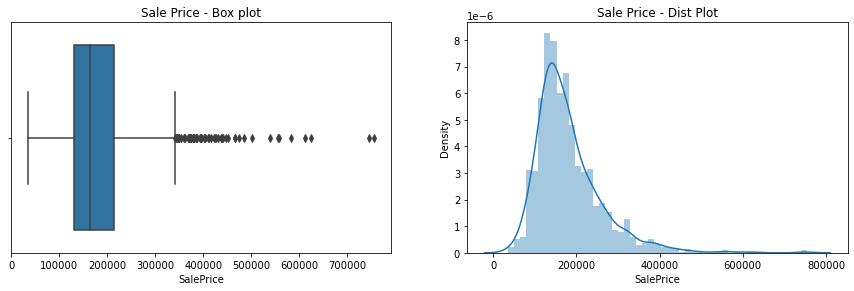

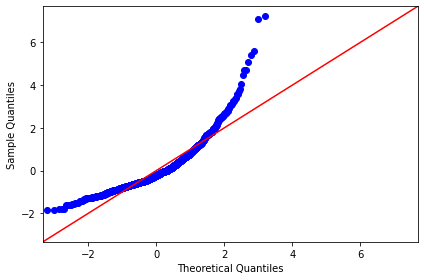

In [27]:
# Visualising SalePrice data - BoxPlot, distributionPlot and QQ Plot
target_col = ['SalePrice']

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 50)

for i in target_col:
    plt.subplot(10, 2, 1)
    plt.title('Sale Price - Box plot')
    plt.xlabel(i)
    sns.boxplot(housingData[i])
    
    plt.subplot(10, 2, 2)
    plt.title('Sale Price - Dist Plot')
    plt.xlabel(i)
    sns.distplot(housingData[i])
    
    sm.qqplot(housingData[i], stats.t, distargs=(4,),fit=True, line="45")
    
plt.tight_layout()
plt.show();

Observations:
1. There are outliers in the data.
2. data is highly right skewed i.e. not normally distributed. The skewness is 1.88

So, we need to perform log transformation on the data.

### Log Transformation of SalePrice

In [28]:
# Applying Log Transformation on target variable - SalePrice as SalePrice_log
housingData['SalePrice_log'] = np.log(housingData['SalePrice'])

salePrice = housingData[['SalePrice']].copy()
housingData = housingData.drop('SalePrice',axis=1) # removing the orignal variable

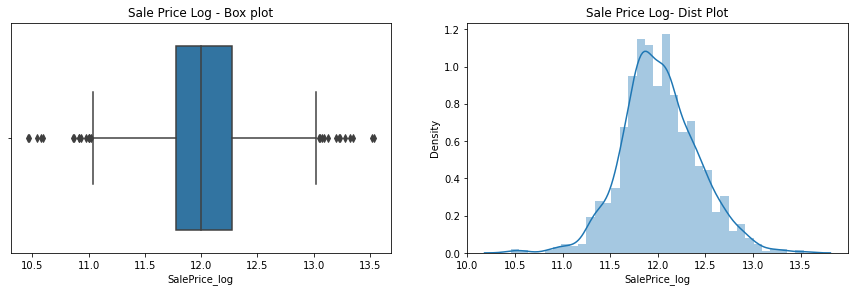

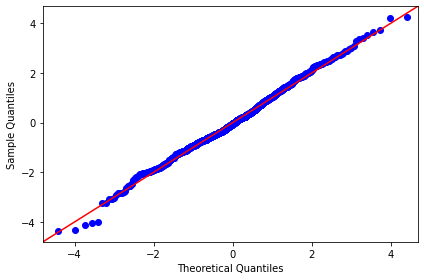

In [29]:
# Visualising Boxplot, distribution PLota and QQ-Plot for SalePrice_log
target_col = ['SalePrice_log']

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 50)

for i in target_col:
    plt.subplot(10, 2, 1)
    plt.title('Sale Price Log - Box plot')
    plt.xlabel(i)
    sns.boxplot(housingData[i])
    
    plt.subplot(10, 2, 2)
    plt.title('Sale Price Log- Dist Plot')
    plt.xlabel(i)
    sns.distplot(housingData[i])
    
    sm.qqplot(housingData[i], stats.t, distargs=(4,),fit=True, line="45")
    
plt.tight_layout()
plt.show();

#### Observation:
- The box plot seems to be symmetrical across median
- The distribution now apprears to be normally distributed.
- The QQ Plot is linear for SalePrice_log

In [30]:
# Adding Target variable (LOG) to numerical DataFrame
numData = pd.concat([numData, housingData[['SalePrice_log']]],axis=1)
numData.head()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,PoolArea,MiscVal,HouseBuiltAge,HouseRemodelAge,GarageAge,EnclosedPorch,3SsnPorch,ScreenPorch,SalePrice,SalePrice_log
0,1,4.189655,9.042040,5.283204,6.561031,0.0,5.017280,6.753438,6.753438,6.751101,0.0,7.444833,548,0.000000,4.127134,0.0,0.0,1.791759,5,1.791759,0.000000,0.0,0.0,208500,12.247694
1,2,4.394449,9.169623,0.000000,6.886532,0.0,5.652489,7.141245,7.141245,0.000000,0.0,7.141245,460,5.700444,0.000000,0.0,0.0,3.465736,31,3.465736,0.000000,0.0,0.0,181500,12.109011
2,3,4.234107,9.328212,5.093750,6.188264,0.0,6.075346,6.825460,6.825460,6.765039,0.0,7.488294,608,0.000000,3.761200,0.0,0.0,2.079442,6,2.079442,0.000000,0.0,0.0,223500,12.317167
3,4,4.110874,9.164401,0.000000,5.379897,0.0,6.293419,6.629363,6.869014,6.629363,0.0,7.448916,642,0.000000,3.583519,0.0,0.0,4.521789,36,2.197225,5.609472,0.0,0.0,140000,11.849398
4,5,4.442651,9.565284,5.860786,6.486161,0.0,6.196444,7.044033,7.044033,6.960348,0.0,7.695758,836,5.262690,4.442651,0.0,0.0,2.197225,8,2.197225,0.000000,0.0,0.0,250000,12.429216


In [31]:
# Dropping 'SalePrice' variable from numerical DataFrame and numerical Columns List
numData = numData.drop('SalePrice', axis = 1)
numCols.remove('SalePrice')

numData.head()

,Id,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,PoolArea,MiscVal,HouseBuiltAge,HouseRemodelAge,GarageAge,EnclosedPorch,3SsnPorch,ScreenPorch,SalePrice_log
0,1,4.189655,9.042040,5.283204,6.561031,0.0,5.017280,6.753438,6.753438,6.751101,0.0,7.444833,548,0.000000,4.127134,0.0,0.0,1.791759,5,1.791759,0.000000,0.0,0.0,12.247694
1,2,4.394449,9.169623,0.000000,6.886532,0.0,5.652489,7.141245,7.141245,0.000000,0.0,7.141245,460,5.700444,0.000000,0.0,0.0,3.465736,31,3.465736,0.000000,0.0,0.0,12.109011
2,3,4.234107,9.328212,5.093750,6.188264,0.0,6.075346,6.825460,6.825460,6.765039,0.0,7.488294,608,0.000000,3.761200,0.0,0.0,2.079442,6,2.079442,0.000000,0.0,0.0,12.317167
3,4,4.110874,9.164401,0.000000,5.379897,0.0,6.293419,6.629363,6.869014,6.629363,0.0,7.448916,642,0.000000,3.583519,0.0,0.0,4.521789,36,2.197225,5.609472,0.0,0.0,11.849398
4,5,4.442651,9.565284,5.860786,6.486161,0.0,6.196444,7.044033,7.044033,6.960348,0.0,7.695758,836,5.262690,4.442651,0.0,0.0,2.197225,8,2.197225,0.000000,0.0,0.0,12.429216


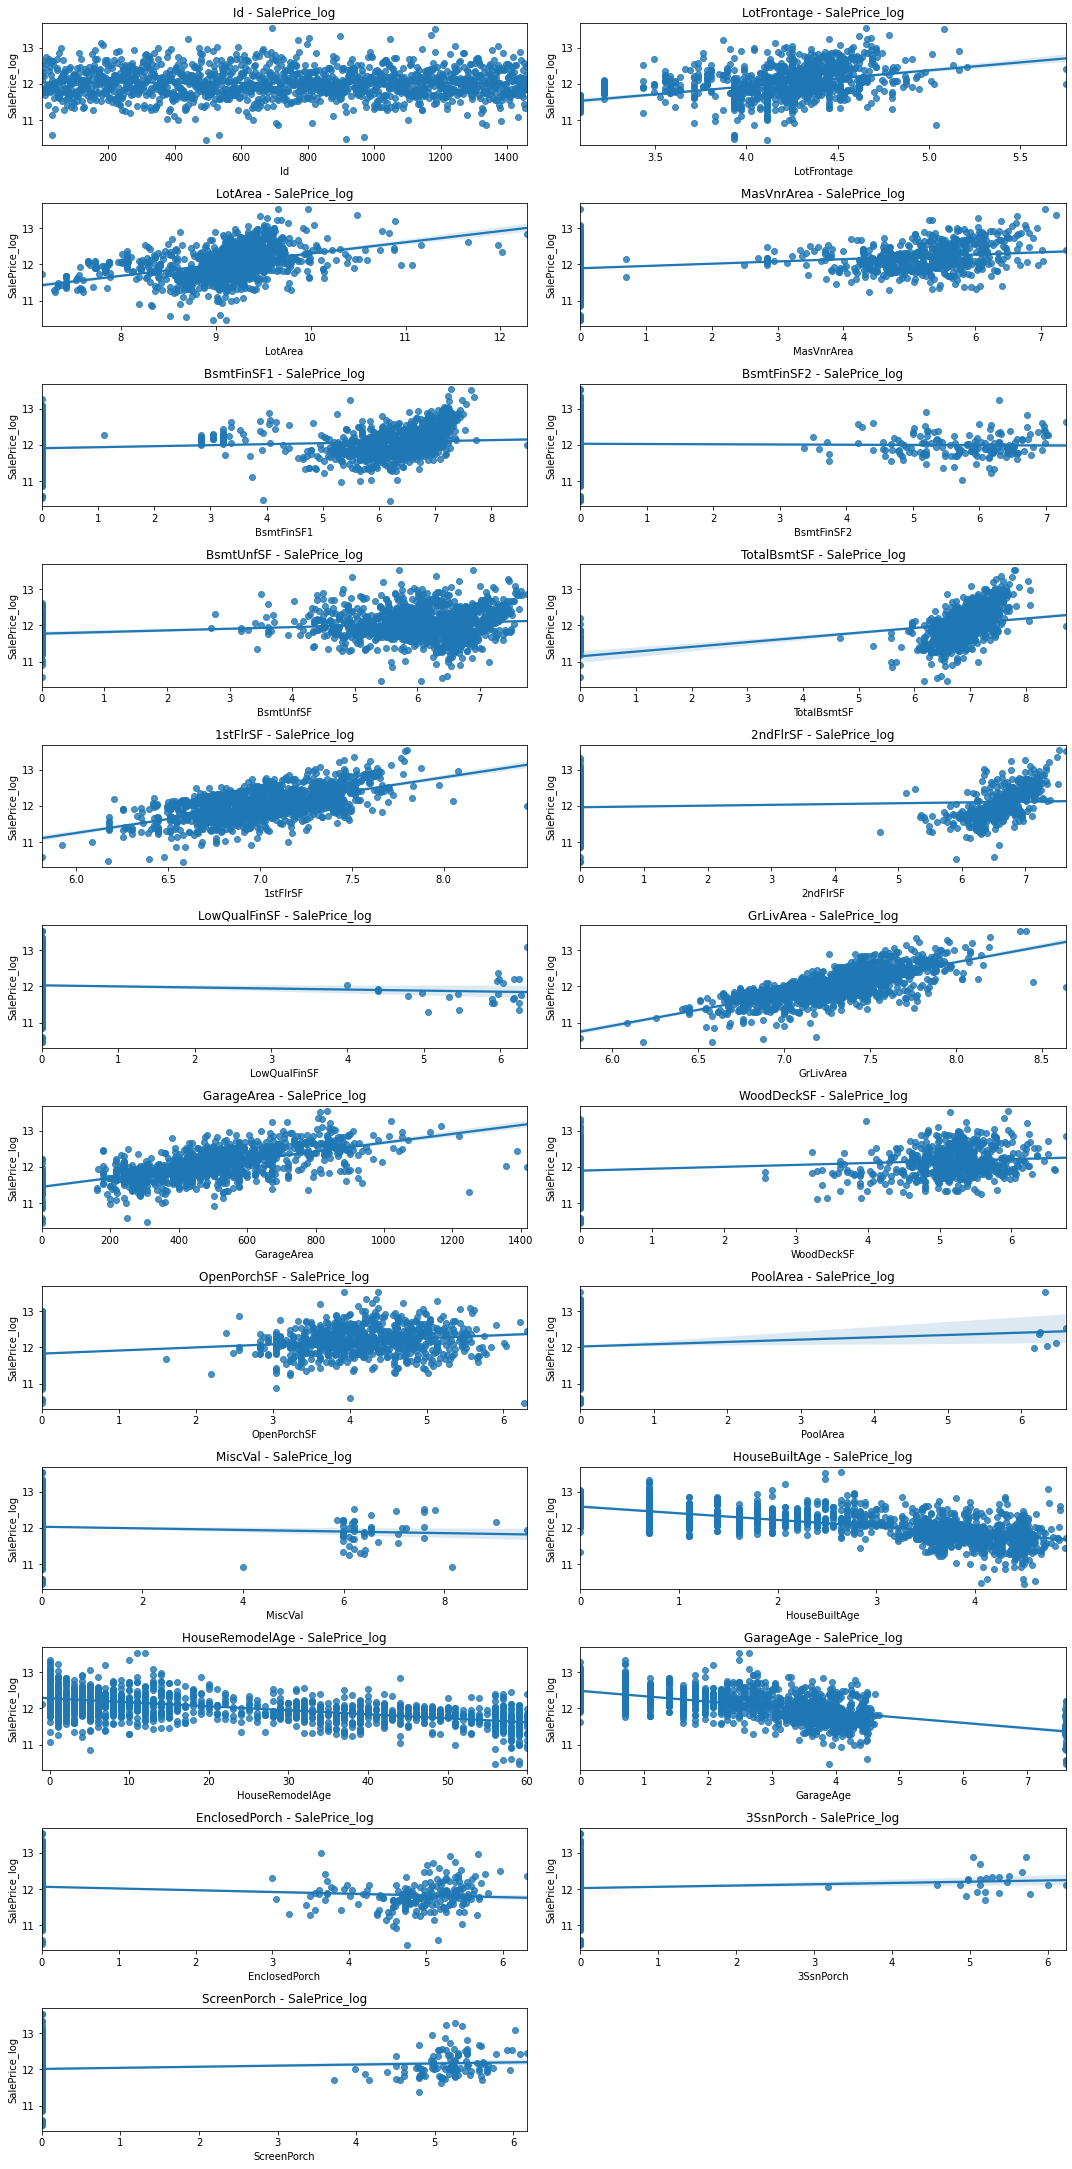

In [32]:
# Visualising transformed numerical data against SalePrice_log value
a = 40
b = 2
c = 1

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 100)

for i in numCols:
    plt.subplot(a, b, c)
    plt.title('{} - SalePrice_log'.format(i))
    plt.xlabel(i)
    sns.regplot(numData[i], numData['SalePrice_log'])
    c = c + 1

plt.tight_layout()
plt.show();

### Correlation - Heatmap (Log transformed Numerical Data)

<AxesSubplot:>

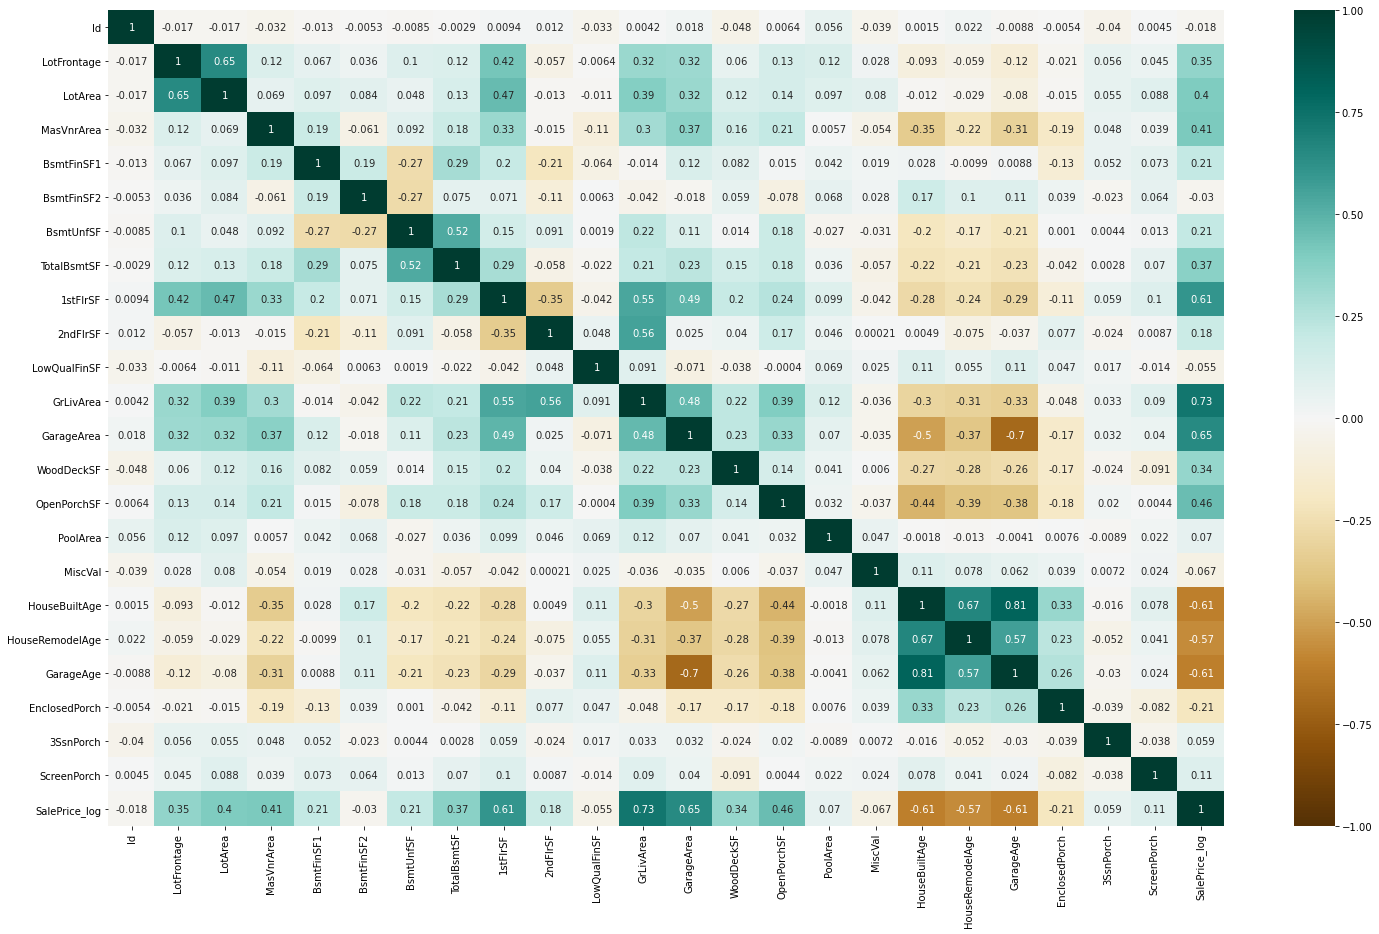

In [33]:
# Checking correlation among tranformed numerical data and SalePrice_log
plt.figure(figsize=(25, 15))

sns.heatmap(numData.corr(),annot=True,vmin=-1, vmax=1, cmap='BrBG')

#### Observation:
- SalePrice_log is higly correlated with GrLivArea, GarageArea, 1stFlrSF, OpenPorchSF, MasVnrArea and LotArea (> 0.4)
- SalePrice_log is negatively correlated with HouseBuiltAge, HouseRemodelAge, garageAge
- These findings are similar to earlier inference from actual dataFrame

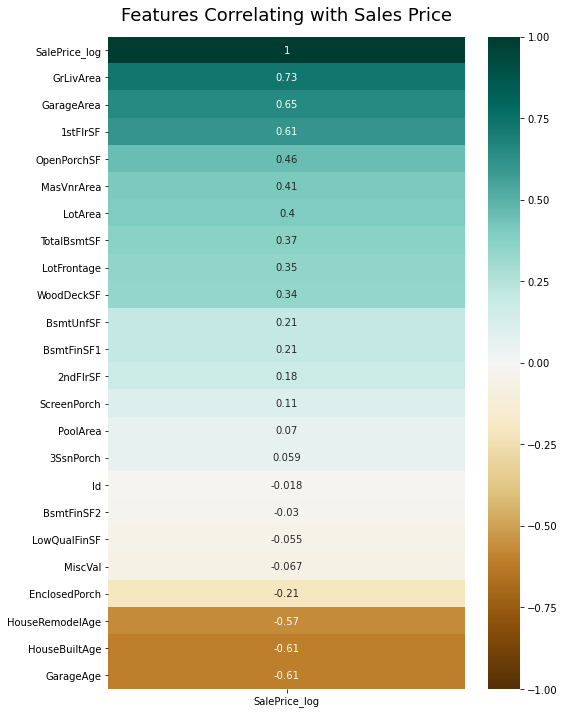

In [34]:
# Visualising the correlation with SalePrice_log feature
plt.figure(figsize=(8, 12))
heatmap_outputvar = sns.heatmap(numData.corr()[['SalePrice_log']].sort_values(by='SalePrice_log', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap_outputvar.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);

##### Neglecting the columns that are not strongly correlated to the target variable numerical features that are less than a threshold corr value of 0.2

In [35]:
# Filtering only correalation which are greater than 0.2
numDataCorr = numData.corr()
topNumDataCorr = numDataCorr.index[abs(numDataCorr['SalePrice_log']) > 0.2]
topNumDataCorr

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'HouseBuiltAge', 'HouseRemodelAge', 'GarageAge',
       'EnclosedPorch', 'SalePrice_log'],
      dtype='object')

In [36]:
# Creating a dataFrame for highly correlated features with SalePrice_log
numDF = numData[topNumDataCorr]
numDF.shape

(1460, 16)

In [37]:
numDF.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,HouseBuiltAge,HouseRemodelAge,GarageAge,EnclosedPorch,SalePrice_log
0,4.189655,9.042040,5.283204,6.561031,5.017280,6.753438,6.753438,7.444833,548,0.000000,4.127134,1.791759,5,1.791759,0.000000,12.247694
1,4.394449,9.169623,0.000000,6.886532,5.652489,7.141245,7.141245,7.141245,460,5.700444,0.000000,3.465736,31,3.465736,0.000000,12.109011
2,4.234107,9.328212,5.093750,6.188264,6.075346,6.825460,6.825460,7.488294,608,0.000000,3.761200,2.079442,6,2.079442,0.000000,12.317167
3,4.110874,9.164401,0.000000,5.379897,6.293419,6.629363,6.869014,7.448916,642,0.000000,3.583519,4.521789,36,2.197225,5.609472,11.849398
4,4.442651,9.565284,5.860786,6.486161,6.196444,7.044033,7.044033,7.695758,836,5.262690,4.442651,2.197225,8,2.197225,0.000000,12.429216


<AxesSubplot:>

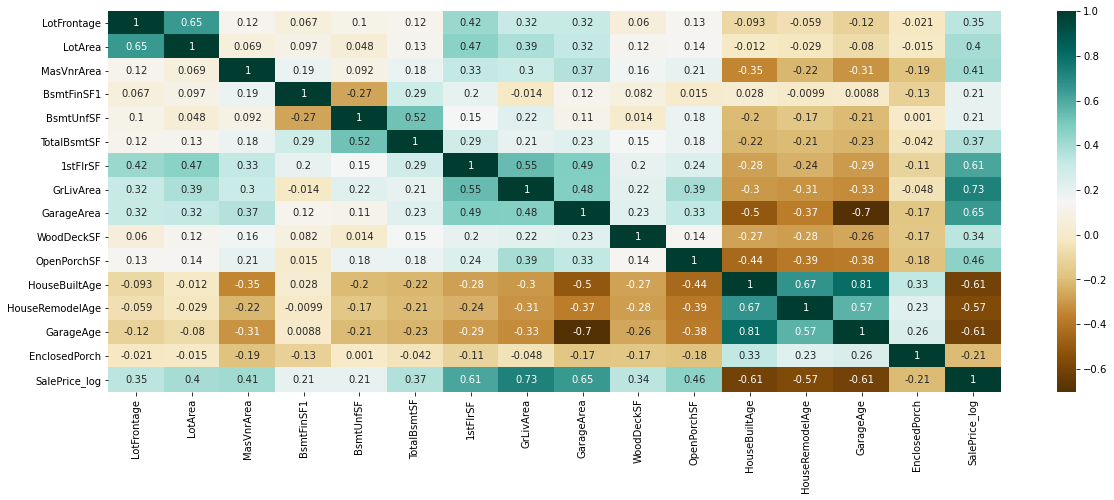

In [38]:
# Creating heatmap for better visualisation
plt.figure(figsize=(20,7))
sns.heatmap(numDF.corr(),annot=True,cmap="BrBG")

### Categorical Variables

In [39]:
# Filtering put the categorical features from DataFrame
catCols = housingData.select_dtypes(include=object).columns.tolist()
catCols

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

In [40]:
# Creating sub- DataFrame with Categorical features only
catData = housingData[catCols]
catData.shape

(1460, 57)

In [41]:
# Checking info for all the categorical features
catData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 57 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   object
 1   MSZoning       1460 non-null   object
 2   Street         1460 non-null   object
 3   Alley          1460 non-null   object
 4   LotShape       1460 non-null   object
 5   LandContour    1460 non-null   object
 6   Utilities      1460 non-null   object
 7   LotConfig      1460 non-null   object
 8   LandSlope      1460 non-null   object
 9   Neighborhood   1460 non-null   object
 10  Condition1     1460 non-null   object
 11  Condition2     1460 non-null   object
 12  BldgType       1460 non-null   object
 13  HouseStyle     1460 non-null   object
 14  OverallQual    1460 non-null   object
 15  OverallCond    1460 non-null   object
 16  RoofStyle      1460 non-null   object
 17  RoofMatl       1460 non-null   object
 18  Exterior1st    1460 non-null

In [42]:
# Checking data for categorical features
catData.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
0,2-STORY 1946 & NEWER,RL,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,3,1,Gd,8,Typ,0,No_FP,Attchd,RFn,2,TA,TA,Y,No_Pool,No_Fence,No_Feature,Feb,2008,WD,Normal
1,1-STORY 1946 & NEWER ALL STYLES,RL,Pave,No_Alley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Above Average,Very Good,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,No_Pool,No_Fence,No_Feature,May,2007,WD,Normal
2,2-STORY 1946 & NEWER,RL,Pave,No_Alley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,No_Pool,No_Fence,No_Feature,Sep,2008,WD,Normal
3,2-STORY 1945 & OLDER,RL,Pave,No_Alley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Good,Average,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,TA,TA,Y,No_Pool,No_Fence,No_Feature,Feb,2006,WD,Abnorml
4,2-STORY 1946 & NEWER,RL,Pave,No_Alley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Very Good,Average,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,TA,TA,Y,No_Pool,No_Fence,No_Feature,Dec,2008,WD,Normal


In [43]:
# Adding Target variable to categorical DataFrame
catData = pd.concat([catData,numDF[['SalePrice_log']]],axis=1)
catData.head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice_log
0,2-STORY 1946 & NEWER,RL,Pave,No_Alley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,3,1,Gd,8,Typ,0,No_FP,Attchd,RFn,2,TA,TA,Y,No_Pool,No_Fence,No_Feature,Feb,2008,WD,Normal,12.247694
1,1-STORY 1946 & NEWER ALL STYLES,RL,Pave,No_Alley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Above Average,Very Good,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,No_Pool,No_Fence,No_Feature,May,2007,WD,Normal,12.109011
2,2-STORY 1946 & NEWER,RL,Pave,No_Alley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Good,Average,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,TA,TA,Y,No_Pool,No_Fence,No_Feature,Sep,2008,WD,Normal,12.317167
3,2-STORY 1945 & OLDER,RL,Pave,No_Alley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Good,Average,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,TA,TA,Y,No_Pool,No_Fence,No_Feature,Feb,2006,WD,Abnorml,11.849398
4,2-STORY 1946 & NEWER,RL,Pave,No_Alley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Very Good,Average,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,TA,TA,Y,No_Pool,No_Fence,No_Feature,Dec,2008,WD,Normal,12.429216


In [44]:
catData.shape

(1460, 58)

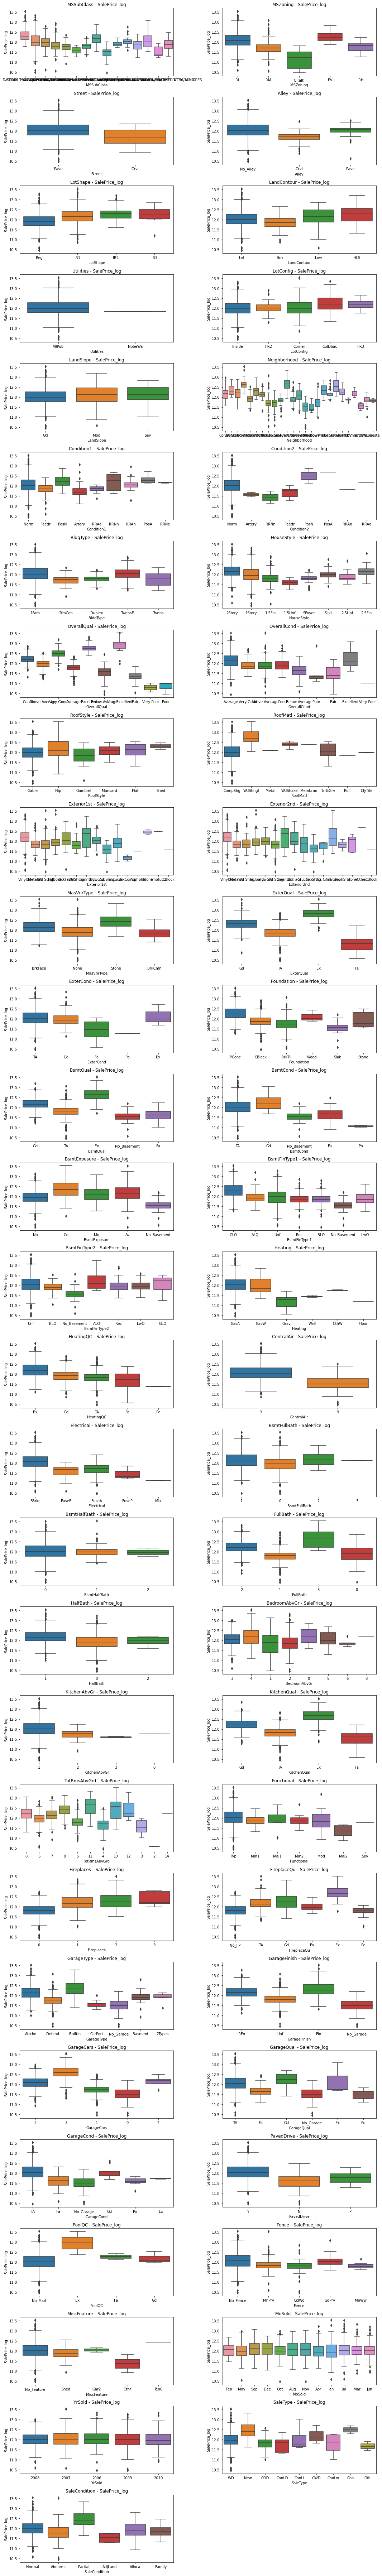

In [45]:
# Creating BocPlots for Categorical features
a = 29
b = 2
c = 1


fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 100)

for i in catCols:
    plt.subplot(a, b, c)
    plt.title('{} - SalePrice_log'.format(i))
    plt.xlabel(i)
    sns.boxplot(catData[i], catData['SalePrice_log'])
    c = c + 1

plt.tight_layout()
plt.show();

#### Observations:
- The sale price of Excellent condition house is highest and very poor condition houses are lowest.
- The median house price has been similar over the years from 2006 to 2010.
- Houses beside paved street is costlier compared to ones besides gravel street.
- Houses having excellent heating have sale price. Similarly houses having central AirConditioning also have higher prices


### One hot Encoding - Encoding Categorical Features

In [46]:
# convert categorical variable into dummy
catData = pd.get_dummies(catData, drop_first = True)
catData.shape

(1460, 308)

In [47]:
catData.head()

,SalePrice_log,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No_Alley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No_Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No_Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No_Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No_Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No_Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenA

### Final DataFrame

In [48]:
# Dropping SalePrice_log from the categorical DataFrame. Since this feature is already available in numerical DF, 
# it would be duplicate when both DFs are joined. Hence dropping from here.
catData = catData.drop('SalePrice_log', axis = 1)
catData.head()

,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No_Alley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No_Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No_Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No_Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No_Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No_Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,Kitchen

In [49]:
# Concatenating categorical and Numerical DataFrames to create final dataFrame.
housingDF =  pd.concat([housingData[['Id']],catData,numDF],axis=1)
housingDF.shape

(1460, 324)

In [50]:
# Dropping Id from DataFrame, as it doesnot impact the salePrice of the house.
housingDF = housingDF.drop('Id', axis = 1)
housingDF.head()

,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No_Alley,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Average,OverallQual_Below Average,OverallQual_Excellent,OverallQual_Fair,OverallQual_Good,OverallQual_Poor,OverallQual_Very Excellent,OverallQual_Very Good,OverallQual_Very Poor,OverallCond_Average,OverallCond_Below Average,OverallCond_Excellent,OverallCond_Fair,OverallCond_Good,OverallCond_Poor,OverallCond_Very Good,OverallCond_Very Poor,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No_Basement,BsmtQual_TA,BsmtCond_Gd,BsmtCond_No_Basement,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No_Basement,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No_Basement,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_No_Basement,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,BsmtFullBath_1,BsmtFullBath_2,BsmtFullBath_3,BsmtHalfBath_1,BsmtHalfBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,BedroomAbvGr_8,KitchenAbvGr_1,KitchenAbvGr_2,KitchenAbvGr_3,Kitchen

## Train-Test Split

In [51]:
# Performing train-test split on the dataFrame
train, test = train_test_split(housingDF, train_size = 0.7, test_size = 0.3, random_state = 25)

In [52]:
# Creating c from the train and test data
y_train = train['SalePrice_log']
X_train = train.drop("SalePrice_log", axis = 1)

y_test= test['SalePrice_log']
X_test = test.drop('SalePrice_log', axis = 1)

In [53]:
# Checking the shape of X_train, X_test, y_train and y_test
print('X train shape',X_train.shape)
print('X test shape',X_test.shape)
print('y train shape',y_train.shape)
print('y test shape',y_test.shape)

X train shape (1021, 322)
X test shape (438, 322)
y train shape (1021,)
y test shape (438,)


In [54]:
y_test.head()

932     12.676076
409     12.735965
1271    12.132157
270     12.491252
1290    12.103486
Name: SalePrice_log, dtype: float64

In [55]:
y_train.head()

122     11.820410
492     12.059803
1205    12.513190
116     11.842229
1017    12.141534
Name: SalePrice_log, dtype: float64

### Linear Regression - Model Building

In [56]:
## Building a Linear Regression model.
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [57]:
# Calculating the RFE  for 50 columns.
rfe = RFE(reg,50)
rfe = rfe.fit(X_train, y_train)

In [58]:
# checking top 50 columns from RFE
col=X_train.columns[rfe.support_]
col

Index(['MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES',
       'MSSubClass_2-STORY 1946 & NEWER',
       'MSSubClass_DUPLEX - ALL STYLES AND AGES',
       'MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
       'MSSubClass_SPLIT FOYER', 'MSZoning_FV', 'MSZoning_RL', 'MSZoning_RM',
       'Neighborhood_MeadowV', 'Condition2_PosN', 'Condition2_RRAe',
       'BldgType_2fmCon', 'BldgType_Duplex', 'OverallQual_Excellent',
       'OverallQual_Good', 'OverallQual_Very Excellent',
       'OverallQual_Very Good', 'OverallQual_Very Poor',
       'OverallCond_Very Poor', 'RoofStyle_Shed', 'RoofMatl_CompShg',
       'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake',
       'RoofMatl_WdShngl', 'Exterior1st_BrkComm', 'Exterior1st_CBlock',
       'Exterior2nd_CBlock', 'BsmtQual_No_Basement', 'BsmtCond_No_Basement',
       'BsmtExposure_No_Basement', 'BsmtFinType1_No_Basement',
       'BsmtFinType2_No_Basement', 'Heating_Grav', 'Heating_OthW',
       'KitchenAbvGr_2', 'Functional_Maj

In [59]:
# Using the columns filtered from RFE, model is trained
X_train_new = X_train[col]
X_train_new = sm.add_constant(X_train_new)

#create first model
lr=sm.OLS(y_train,X_train_new)

#fit the model
lr_model=lr.fit()

#Print the summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          SalePrice_log   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     159.8
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        01:05:11   Log-Likelihood:                 489.16
No. Observations:                1021   AIC:                            -904.3
Df Residuals:                     984   BIC:                            -722.0
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    4.4933      0.228     19.714      0.000       4.046       4.941
MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES     0.0223      0.020      1.143      0.253      -0.016       0.061
MSSubClass_2-STORY 1946 & NEWER                          0.0843      0.015      5.492      0.000       0.054       0.114
MSSubClass_DUPLEX - ALL STYLES AND AGES                  0.0495      0.024      2.091      0.037       0.003       0.096
MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER       0.2710      0.062      4.351      0.000       0.149       0.393
MSSubClass_SPLIT FOYER                                   0.0834      0.039      2.133      0.033       0.007       0.160
MSZoning_FV                                              0.3359      0.049      6.816      0.000       0.239       0.433
MSZoning_RL                                              0.2800      0.043      6.451      0.000       0.195       0.365
MSZoning_RM                                              0.1362      0.045      3.059      0.002       0.049       0.224
Neighborhood_MeadowV                                    -0.1700      0.055     -3.110      0.002      -0.277      -0.063
Condition2_PosN                                         -0.5982      0.120     -4.978      0.000      -0.834      -0.362
Condition2_RRAe                                         -0.0003      0.078     -0.004      0.997      -0.153       0.152
BldgType_2fmCon                                          0.0223      0.020      1.143      0.253      -0.016       0.061
BldgType_Duplex                                          0.0495      0.024      2.091      0.037       0.003       0.096
OverallQual_Excellent                                    0.5166      0.033     15.527      0.000       0.451       0.582
OverallQual_Good                                         0.1586      0.014     11.344      0.000       0.131       0.186
OverallQual_Very Excellent                               0.5426      0.054      9.970      0.000       0.436       0.649
OverallQual_Very Good                                    0.3073      0.018     16.976      0.000       0.272       0.343
OverallQual_Very Poor                                   -0.2358      0.077     -3.055      0.002      -0.387      -0.084
OverallCond_Very Poor                                   -0.2358      0.077     -3.055      0.002      -0.387      -0.084
RoofStyle_Shed                                          -0.0003      0.078     -0.004      0.997      -0.153       0.152
RoofMatl_CompShg                                         1.6127      0.226      7.145      0.000       1.170       2.056
RoofMatl_Roll                                            1

#### Observation:
- R2 Score is 0.854 and Adj. R2_Score is 0.849.

### Ridge Regression - Model Building

In [60]:
# Fine tuning list of Alphas for Ridge Regression

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [61]:
# Printing the best alpha
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 6.0}
-0.08497325546127037


In [62]:
# Checking crossValidation results for 26 candidates.
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.031216,0.007665,0.009855,0.001845,0.0001,{'alpha': 0.0001},-0.108751,-0.095988,-0.108165,-0.097553,-0.096709,-0.101433,0.005760,25,-0.054011,-0.056508,-0.053927,-0.053446,-0.058371,-0.055252,0.001890
1,0.026542,0.003976,0.007912,0.000615,0.001,{'alpha': 0.001},-0.107480,-0.095886,-0.107858,-0.097424,-0.096285,-0.100987,0.005481,24,-0.054048,-0.056510,-0.053967,-0.053482,-0.058409,-0.055283,0.001885
2,0.024783,0.002846,0.008631,0.000771,0.01,{'alpha': 0.01},-0.102734,-0.095036,-0.105682,-0.096508,-0.093300,-0.098652,0.004741,23,-0.054333,-0.056552,-0.054391,-0.053848,-0.058674,-0.055560,0.001816
3,0.023304,0.001451,0.009176,0.002554,0.05,{'alpha': 0.05},-0.099602,-0.092807,-0.101947,-0.095223,-0.087504,-0.095417,0.005092,21,-0.055014,-0.056900,-0.055712,-0.055001,-0.059185,-0.056362,0.001572
4,0.028158,0.005130,0.008546,0.001610,0.1,{'alpha': 0.1},-0.098781,-0.090907,-0.100214,-0.093893,-0.084276,-0.093614,0.005742,20,-0.055638,-0.057277,-0.056472,-0.055660,-0.059660,-0.056941,0.001488
5,0.024171,0.003162,0.009954,0.002255,0.2,{'alpha': 0.2},-0.097507,-0.089155,-0.098374,-0.092219,-0.082806,-0.092012,0.005721,19,-0.056473,-0.057940,-0.057272,-0.056408,-0.060465,-0.057712,0.001488
6,0.024048,0.002954,0.009994,0.002379,0.3,{'alpha': 0.3},-0.096623,-0.087904,-0.097106,-0.091330,-0.082539,-0.091100,0.005480,18,-0.057130,-0.058510,-0.057756,-0.056969,-0.061093,-0.058292,0.001502
7,0.022339,0.002020,0.008722,0.001681,0.4,{'alpha': 0.4},-0.095955,-0.086816,-0.096095,-0.090728,-0.082305,-0.090380,0.005325,17,-0.057679,-0.058984,-0.058109,-0.057431,-0.061655,-0.058772,0.001536
8,0.026115,0.002778,0.007871,0.000462,0.5,{'alpha': 0.5},-0.095362,-0.085862,-0.095253,-0.090309,-0.082093,-0.089776,0.005212,16,-0.058173,-0.059362,-0.058436,-0.057835,-0.062111,-0.059183,0.001549
9,0.025622,0.002660,0.008717,0.001521,0.6,{'alpha': 0.6},-0.094915,-0.085096,-0.094517,-0.089944,-0.081838,-0.089262,0.005148,15,-0.058616,-0.059714,-0.058722,-0.058241,-0.062495,-0.059558,0.001547


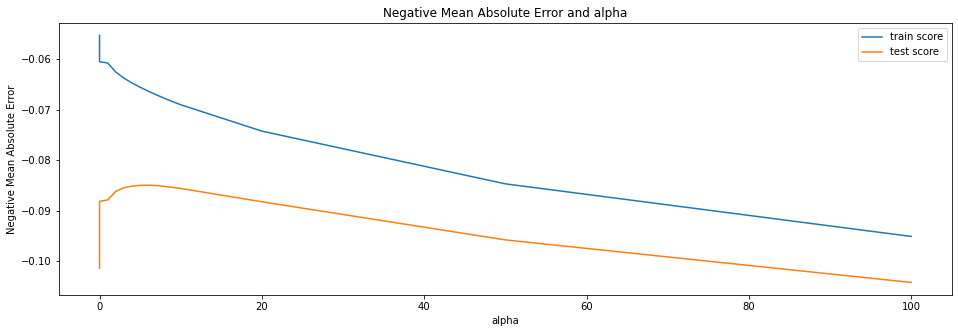

In [63]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [64]:
# final ridge model
alpha = 6.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-2.55978737e-02, -4.67634138e-02,  4.32262148e-02,  2.74389872e-02,
        8.75371173e-03, -4.16070670e-03,  3.35476040e-02,  1.36820254e-02,
       -7.32111248e-03, -4.80752372e-02,  1.05593099e-02, -1.79602198e-03,
        2.15202944e-02, -2.03716778e-03,  7.46856203e-02,  2.17529460e-02,
        6.69335775e-02,  3.11992958e-02,  6.12929486e-02,  3.38716496e-03,
        3.30428021e-02,  4.83901435e-02, -3.35852280e-02, -2.54774333e-04,
        6.08127161e-02,  1.47159828e-02,  4.61329880e-02,  0.00000000e+00,
        2.25984825e-02, -3.91575584e-02, -2.94597715e-02, -7.52244171e-03,
        1.96375297e-02, -2.28523795e-02, -1.72157914e-03, -7.17521800e-04,
        3.98855036e-02,  2.90628439e-02, -1.73999441e-02,  8.95802505e-02,
       -7.87329512e-02, -3.31392769e-02, -7.56494149e-02, -7.20336326e-02,
       -2.48442176e-02, -2.93463681e-02,  1.86966946e-02, -3.39605687e-02,
        5.15788856e-02,  6.97389285e-02, -4.80685437e-02, -2.65029521e-02,
       -1.91013071e-02, -

### Prediction

In [65]:
# Predicting y_train and y_test using Ridge model and comparing the results

y_train_pred = ridge.predict(X_train)
y_test_pred = ridge.predict(X_test)

metric1 = []

train1_r2 = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("R2_Score_Train : ", train1_r2)
metric1.append(train1_r2)
test1_r2 = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("R2_Score_Test : ", test1_r2)
metric1.append(test1_r2)

rss1_train = np.sum(np.square(y_train - y_train_pred))
print("RSS_Train : ", rss1_train)
metric1.append(rss1_train)
rss1_test = np.sum(np.square(y_test - y_test_pred))
print("RSS_Test : ",rss1_test)
metric1.append(rss1_test)

rmse1_train = mean_squared_error(y_train, y_train_pred, squared=False)
print("RMSE_Train : ",rmse1_train)
metric1.append(rmse1_train)
rmse1_test = mean_squared_error(y_test, y_test_pred, squared=False)
print("RMSE_Test : ",rmse1_test)
metric1.append(rmse1_test)

mae1_train = mean_absolute_error(y_train, y_train_pred)
print("MAE_Train : ",mae1_train)
metric1.append(mae1_train)
mae1_test = mean_absolute_error(y_test, y_test_pred)
print("MAE_Test : ",mae1_test)
metric1.append(mae1_test)

R2_Score_Train :  0.935836841907745
R2_Score_Test :  0.8894676540163479
RSS_Train :  10.073799258337504
RSS_Test :  8.369820888774008
RMSE_Train :  0.09933076383878647
RMSE_Test :  0.13823595809830444
MAE_Train :  0.06699909307866156
MAE_Test :  0.09477335645970104


#### Observation:
- The difference in R2_Score for test and train is minor suggesting that the model is not overfit or underfit. It's a good fit model.
- The RSS for test and train data is also having minor difference only, suggesting good fit.

### Lasso Regression - Model Building

In [66]:
#  Fine Tuning list of Alphas for Lasso regression
params = {'alpha': [0.00005, 0.00001, 0.0001, 0.001, 0.008, 0.01]}
lasso = Lasso()

# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [5e-05, 1e-05, 0.0001, 0.001, 0.008, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [67]:
cv_results_l = pd.DataFrame(lasso_cv.cv_results_)

In [68]:
# Printing the best Alpha
print(lasso_cv.best_params_)
print(lasso_cv.best_score_)

{'alpha': 0.001}
-0.08819960709207217


In [69]:
# final lasso model
alpha = 0.001
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [70]:
# predicting y_train and y_test from the lasso model and comparing the train - test results 
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

metric2 = []

train1_r2 = metrics.r2_score(y_true=y_train, y_pred=y_train_pred)
print("R2_Score_Train : ", train1_r2)
metric2.append(train1_r2)
test1_r2 = metrics.r2_score(y_true=y_test, y_pred=y_test_pred)
print("R2_Score_Test : ", test1_r2)
metric2.append(test1_r2)

rss1_train = np.sum(np.square(y_train - y_train_pred))
print("RSS_Train : ", rss1_train)
metric2.append(rss1_train)
rss1_test = np.sum(np.square(y_test - y_test_pred))
print("RSS_Test : ", rss1_test)
metric2.append(rss1_test)

rmse1_train = mean_squared_error(y_train, y_train_pred, squared=False)
print("RMSE_Train : ", rmse1_train)
metric2.append(rmse1_train)
rmse1_test = mean_squared_error(y_test, y_test_pred, squared=False)
print("RMSE_Test : ", rmse1_test)
metric2.append(rmse1_test)

mae1_train = mean_absolute_error(y_train, y_train_pred)
print("MAE_Train : ",mae1_train)
metric2.append(mae1_train)
mae1_test = mean_absolute_error(y_test, y_test_pred)
print("MAE_Test : ",mae1_test)
metric2.append(mae1_test)

R2_Score_Train :  0.9118976497832271
R2_Score_Test :  0.889250673920401
RSS_Train :  13.832320862315045
RSS_Test :  8.386251233424186
RMSE_Train :  0.11639508886278728
RMSE_Test :  0.1383715733586702
MAE_Train :  0.07769127270893186
MAE_Test :  0.09183119884726555


#### Observations:
- The difference in R2_Score for test and train is minor suggesting that the model is not overfit or underfit. It's a good fit model.

In [71]:
lasso.coef_

array([-6.55285302e-03, -4.86734711e-02,  3.13517902e-02,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  2.76540991e-03,
       -0.00000000e+00, -1.58272425e-02,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  4.74539144e-02,  0.00000000e+00,
        4.25066159e-02, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  3.33568108e-02, -0.00000000e+00, -0.00000000e+00,
        8.03243660e-03,  0.00000000e+00,  1.52430626e-02,  0.00000000e+00,
        2.48105182e-02, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        4.19561429e-02,  0.00000000e+00, -0.00000000e+00,  1.00561344e-01,
       -5.70111582e-02, -0.00000000e+00, -3.43413084e-02, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        2.53403678e-02,  7.01187108e-02, -2.12211596e-02, -0.00000000e+00,
       -0.00000000e+00, -

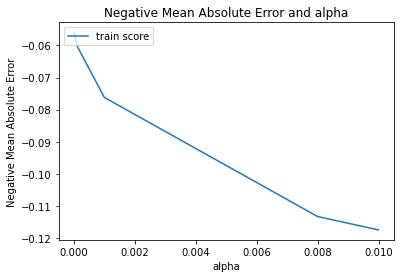

In [72]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_l['param_alpha'], cv_results_l['mean_train_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [73]:
# Creating a table which contain all the metrics and comparing Ridge and Lasso models

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'RMSE (Train)','RMSE (Test)', 'MAE (Train)','MAE (Test)'], 
        
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric'] )

rg_metric = pd.Series(metric1, name = 'Ridge Regression')
ls_metric = pd.Series(metric2, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.935837,0.911898
1,R2 Score (Test),0.889468,0.889251
2,RSS (Train),10.073799,13.832321
3,RSS (Test),8.369821,8.386251
4,RMSE (Train),0.099331,0.116395
5,RMSE (Test),0.138236,0.138372
6,MAE (Train),0.066999,0.077691
7,MAE (Test),0.094773,0.091831


- Best alpha value for Lasso : {'alpha': 0.001}
- Best alpha value for Ridge : {'alpha': 6.0}

In [74]:
# Checking the betas
betas = pd.DataFrame(index=X_train.columns)
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas.sort_values(by=['Lasso'], ascending=False).head(15)

,Ridge,Lasso
GrLivArea,0.225738,0.335839
OverallQual_Excellent,0.132463,0.183282
Neighborhood_StoneBr,0.116562,0.113189
OverallQual_Very Good,0.098242,0.106575
Functional_Typ,0.085078,0.104576
Neighborhood_Crawfor,0.089580,0.100561
Exterior1st_BrkFace,0.060455,0.078068
1stFlrSF,0.091304,0.075587
CentralAir_Y,0.060952,0.075044
Neighborhood_NridgHt,0.069739,0.070119


#### Observation:
Top 5 features from the Lasso model are:
- GrLivArea
- OverallQual_Excellent
- Neighborhood_StoneBr
- OverallQual_Very Good
- Functional_Typ

### Question 1
What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [75]:
#earlier for Ridge alpha = 6.0 now take 12.0

alpha = 12.0
ridge2 = Ridge(alpha=alpha)

ridge2.fit(X_train, y_train)
print(ridge2.coef_)


y_pred_train = ridge2.predict(X_train)
y_pred_test = ridge2.predict(X_test)

r2_train_lr = r2_score(y_train, y_pred_train)
print("R2_Score_Train : ", r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2_Score_Test : ", r2_test_lr)

[-1.71435156e-02 -5.41253966e-02  3.72110913e-02  2.38315493e-02
  4.98530633e-03 -5.89403526e-03  3.27154855e-02  2.16912391e-02
 -7.91832227e-03 -3.70224556e-02  9.08242908e-03 -5.32232703e-03
  1.34890639e-02 -3.22273920e-03  5.02451396e-02  7.28368239e-03
  5.02387214e-02  6.61750116e-03  4.44912075e-02  4.20789042e-04
  2.60291492e-02  4.37987120e-02 -2.90139528e-02 -1.55816287e-03
  5.04846576e-02  8.09208376e-03  3.90132096e-02  0.00000000e+00
  2.44504318e-02 -3.16415174e-02 -1.44941993e-02 -5.28303206e-03
  1.68586752e-02 -1.72441674e-02  5.85849651e-04  1.75826404e-03
  4.00425019e-02  2.41408172e-02 -1.84311954e-02  7.98775130e-02
 -7.18082597e-02 -3.34896404e-02 -5.97353974e-02 -5.23612118e-02
 -2.22541813e-02 -2.40463126e-02  9.27468762e-03 -2.58585875e-02
  4.16800021e-02  6.00002715e-02 -3.60550892e-02 -1.93149002e-02
 -1.58275537e-02 -8.45524957e-03  2.56010699e-02  9.41682670e-02
 -9.01442237e-03  2.31643859e-02 -1.48083957e-02  3.94351007e-02
  1.17048055e-02 -1.21308

The R2_Score have decreased from 0.9358 to 0.9289 and from 0.8894 to 0.8875 for train and test data respectively

In [76]:
betasR = pd.DataFrame(index=X_train.columns)
betasR['Ridge'] = ridge2.coef_
betasR.sort_values(by=['Ridge'], ascending=False).head(5)

,Ridge
GrLivArea,0.191188
OverallQual_Excellent,0.112608
1stFlrSF,0.100661
Neighborhood_StoneBr,0.094168
OverallQual_Very Good,0.088716


In [77]:
#earlier for Lasso alpha = 0.001 now take 0.002
alpha = 0.002

lasso2 = Lasso(alpha=alpha)
        
lasso2.fit(X_train, y_train) 
print(lasso2.coef_)


y_train_pred = lasso2.predict(X_train)
y_test_pred = lasso2.predict(X_test)


r2_train_lr = r2_score(y_train, y_pred_train)
print("R2_Score_Train : ", r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2_Score_Test : ", r2_test_lr)


[-0.00000000e+00 -3.59930523e-02  2.18278094e-02  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  7.23732374e-03 -0.00000000e+00
  4.00743875e-02 -5.12534573e-03  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.06131433e-02 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  1.80824534e-02  0.00000000e+00 -0.00000000e+00  8.16310315e-02
 -5.04438688e-02 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00  3.57095830e-02 -6.75900636e-03 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  6.79998122e-02
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  4.73703430e-02
  0.00000000e+00 -0.00000

In [78]:
betasL = pd.DataFrame(index=X_train.columns)
betasL['Lasso'] = lasso2.coef_
betasL.sort_values(by=['Lasso'], ascending=False).head(5)

,Lasso
GrLivArea,0.351886
OverallQual_Excellent,0.154858
Functional_Typ,0.099769
OverallQual_Very Good,0.092724
Neighborhood_Crawfor,0.081631


The R2_Score have increased from 0.9118 to 0.9289 for train data and decreased from 0.8892 to 0.8875 for test data.

The top 5 features from Lasso model are:
- GrLivArea
- OverallQual_Excellent
- Functional_Typ
- OverallQual_Very Good
- Neighborhood_Crawfor

### Question 3:

After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

The top 5 features from Lasso model are:
- GrLivArea
- OverallQual_Excellent
- Neighborhood_StoneBr
- OverallQual_Very Good
- Functional_Typ

In [79]:
#Drop 5 features
X_train_new2 = X_train.drop(['GrLivArea', 'OverallQual_Excellent', 'Neighborhood_StoneBr', 'OverallQual_Very Good', 
                            'Functional_Typ'], axis=1)

X_test_new2 = X_test.drop(['GrLivArea', 'OverallQual_Excellent', 'Neighborhood_StoneBr', 'OverallQual_Very Good', 
                            'Functional_Typ'], axis=1)

In [80]:
lasso = Lasso()

# cross validation
model_cv2 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv2.fit(X_train_new2, y_train) 


Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [5e-05, 1e-05, 0.0001, 0.001, 0.008, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [81]:
# Printing the best hyperparameter alpha
print(model_cv2.best_params_)

{'alpha': 0.0001}


In [82]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised

alpha = 0.0001

lasso3 = Lasso(alpha=alpha)
        
lasso3.fit(X_train_new2, y_train) 

Lasso(alpha=0.0001)

In [83]:
lasso3.coef_

array([-0.00000000e+00, -1.50069896e-02,  7.92795831e-02,  6.02911461e-02,
        5.14708189e-02, -2.52979729e-03,  7.07695347e-02,  2.30578637e-02,
        0.00000000e+00, -7.38373051e-02, -0.00000000e+00, -0.00000000e+00,
        6.30480279e-03, -1.69797651e-02,  3.48195265e-01,  2.84783539e-01,
        3.31484219e-01,  2.84258940e-01,  6.92252268e-02,  2.84834571e-03,
        5.77377927e-02,  4.65932010e-02, -0.00000000e+00,  5.77888745e-04,
        8.29719109e-02,  1.79541236e-02,  5.04362507e-02,  0.00000000e+00,
        2.64459687e-02, -5.52008992e-02, -1.02664977e-01, -1.30324395e-02,
        2.33024399e-02, -1.24772736e-02, -0.00000000e+00, -2.55974310e-02,
       -2.16522702e-02, -3.11519930e-02, -7.70782768e-02,  4.31794351e-02,
       -1.46072521e-01, -9.14877173e-02, -1.00376911e-01, -2.05150973e-01,
       -9.63168590e-02, -1.06181431e-01, -0.00000000e+00, -1.02103014e-01,
        2.34600491e-02,  1.10284154e-02, -1.01934721e-01, -8.13506787e-02,
       -8.58545332e-02, -

In [84]:
y_pred_train = lasso3.predict(X_train_new2)
y_pred_test = lasso3.predict(X_test_new2)

r2_train_lr = r2_score(y_train, y_pred_train)
print("R2_Score_Train : ", r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2_Score_Test : ", r2_test_lr)

R2_Score_Train :  0.9387645002116002
R2_Score_Test :  0.8781413232972782


In [85]:
betasL3 = pd.DataFrame(index=X_train_new2.columns)
betasL3['Lasso'] = lasso3.coef_
betasL3.sort_values(by=['Lasso'], ascending=False).head(5)

,Lasso
MSZoning_FV,0.348195
MSZoning_RL,0.331484
RoofMatl_WdShngl,0.314789
MSZoning_RH,0.284784
MSZoning_RM,0.284259


The next 5 features from Lasso model are:
- MSZoning_FV
- MSZoning_RL
- RoofMatl_WdShngl
- MSZoning_RH	
- MSZoning_RM